**A4**

Коцевич Андрей, Б02-920

Теоретические задачи оформлены в отдельном pdf-файле, поскольку некоторые из них в блокноте нормально не отображаются.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_spd_matrix
from  sklearn.decomposition import PCA
from scipy import linalg

**1.** Сгенерируйте случайную симметричную матрицу A размера 3×3. Сгенерируйте N элементов из нормального распределения $P\propto e^{-\vec{x}^TA\vec{x}}$ (получится матрица объект-признак $X$ размерности $N×3$). Визуализируйте полученное облако точек (для построения интерактивных трёхмерных графиков можно воспользоваться пакетом ipympl в системе jupyter). Примените к матрице $X$ метод главных компонент, визуализируйте сингулярные вектора вместе с облаком точек, а также двумерные проекции элементов выборки на плоскости, задаваемые сингулярными векторами.

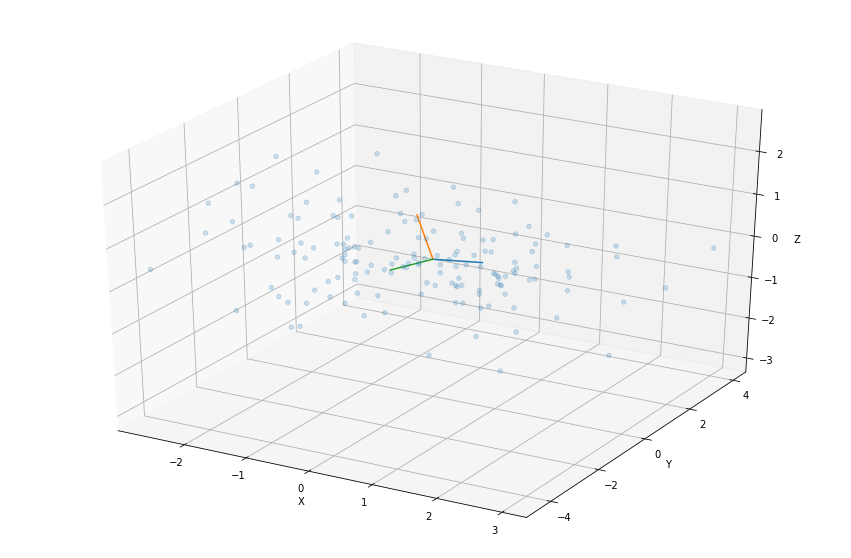

In [5]:
N = 150
# генерация случайной симметричной матрицы A
A = make_spd_matrix(3)
# генерация многомерного нормального гауссового распределения
X = np.random.multivariate_normal(np.zeros(3), A, N)
# PCA
pca = PCA(n_components=3)
data = pca.fit_transform(X)

# Визуализация облака точек
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(X.T[0], X.T[1], X.T[2], alpha=0.2)

# Визуализация сингулярных векторов
x0, y0, z0 = pca.components_[0];
ax.plot([0, x0], [0, y0], [0, z0])
x1, y1, z1 = pca.components_[1];
ax.plot([0, x1], [0, y1], [0, z1])
x2, y2, z2 = pca.components_[2];
ax.plot([0, x2], [0, y2], [0, z2])    
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

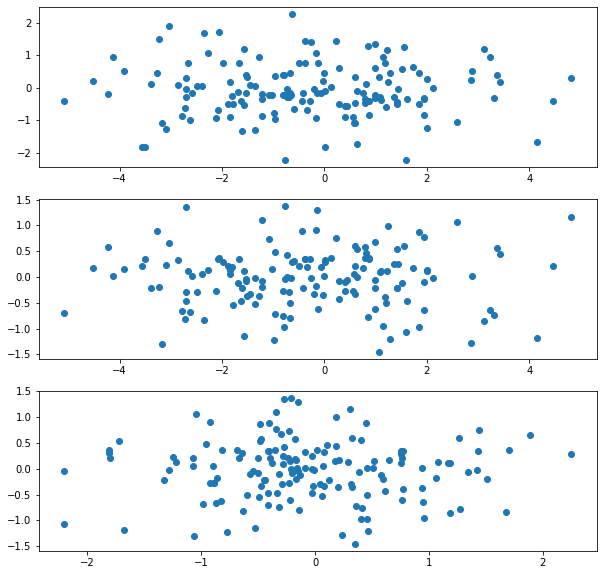

In [9]:
# Двумерные проекции на плоскости
U, L, V = linalg.svd(X) # сингулярное разложение
B = X @ V.T
fig, axs = plt.subplots(3,figsize=(10,10))
axs[0].scatter(B.T[0], B.T[1])
axs[1].scatter(B.T[0], B.T[2])
axs[2].scatter(B.T[1], B.T[2])
plt.show()